# predict if the client will subscribe to term deposit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
test=pd.read_csv('test.csv')
test.head(1)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown


In [4]:
train=pd.read_csv('train.csv')
train.head(1)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no


In [5]:
df=pd.concat([train,test],axis=0,ignore_index=True)
df.head(1)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no


In [6]:
df.shape

(45211, 18)

In [7]:
test.shape

(13564, 17)

In [8]:
train.shape

(31647, 18)

In [9]:
df.isnull().sum()

ID                0
age               0
job               0
marital           0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
subscribed    13564
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   job         45211 non-null  object
 3   marital     45211 non-null  object
 4   education   45211 non-null  object
 5   default     45211 non-null  object
 6   balance     45211 non-null  int64 
 7   housing     45211 non-null  object
 8   loan        45211 non-null  object
 9   contact     45211 non-null  object
 10  day         45211 non-null  int64 
 11  month       45211 non-null  object
 12  duration    45211 non-null  int64 
 13  campaign    45211 non-null  int64 
 14  pdays       45211 non-null  int64 
 15  previous    45211 non-null  int64 
 16  poutcome    45211 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [11]:
df['subscribed'].mode()

0    no
Name: subscribed, dtype: object

In [12]:
df['subscribed'].fillna(df['subscribed'].mode()[0],inplace=True)

In [13]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [14]:
df['subscribed'].value_counts()

subscribed
no     41496
yes     3715
Name: count, dtype: int64

In [15]:
df.nunique()

ID            45211
age              77
job              12
marital           3
education         4
default           2
balance        7168
housing           2
loan              2
contact           3
day              31
month            12
duration       1573
campaign         48
pdays           559
previous         41
poutcome          4
subscribed        2
dtype: int64

In [16]:
for i in df.select_dtypes(include='object').columns:
    print(i)
    print(df[i].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure' 'other']
subscribed
['no' 'yes']


In [17]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


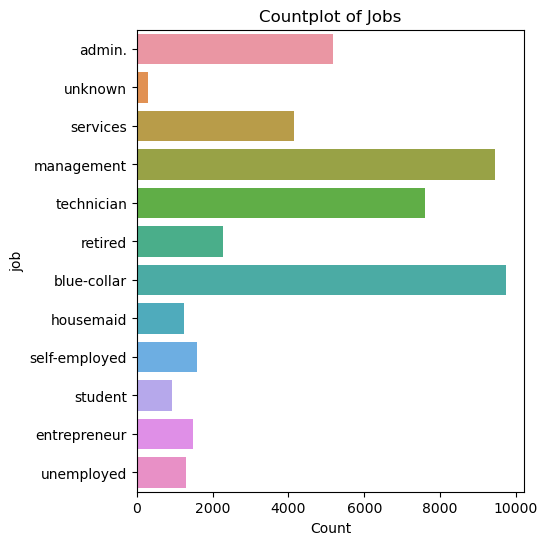

In [18]:
plt.figure(figsize=(5,6), facecolor='white')
sns.countplot(y='job', data=df)
plt.xlabel('Count') 
plt.title('Countplot of Jobs') 
plt.show()

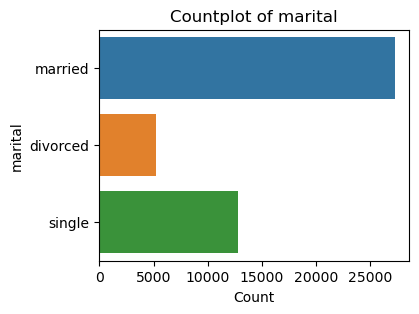

In [23]:
plt.figure(figsize=(4,3), facecolor='white')
sns.countplot(y='marital', data=df)
plt.xlabel('Count') 
plt.title('Countplot of marital') 
plt.show()

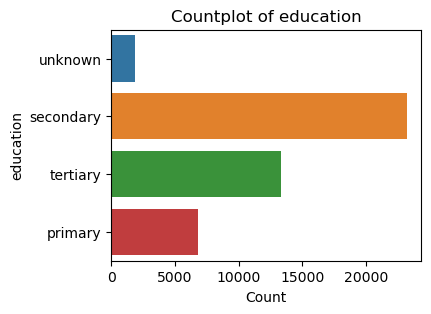

In [24]:
plt.figure(figsize=(4,3), facecolor='white')
sns.countplot(y='education', data=df)
plt.xlabel('Count') 
plt.title('Countplot of education') 
plt.show()

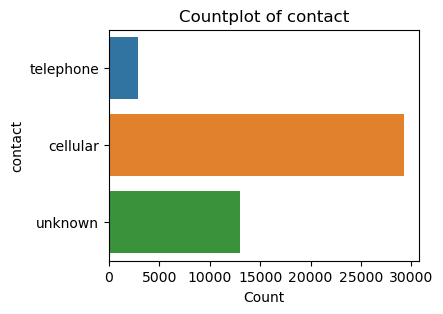

In [25]:
plt.figure(figsize=(4,3), facecolor='white')
sns.countplot(y='contact', data=df)
plt.xlabel('Count') 
plt.title('Countplot of contact') 
plt.show()

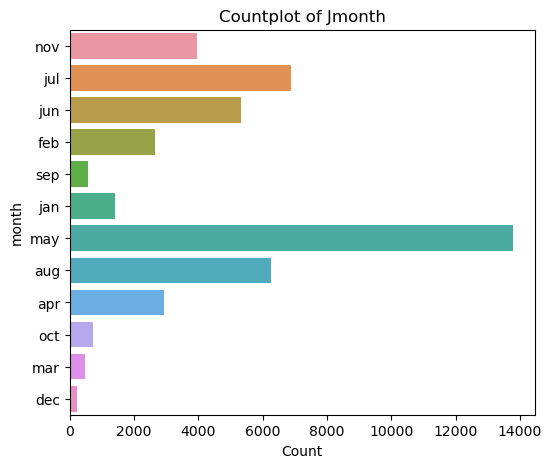

In [26]:
plt.figure(figsize=(6,5), facecolor='white')
sns.countplot(y='month', data=df)
plt.xlabel('Count') 
plt.title('Countplot of Jmonth') 
plt.show()

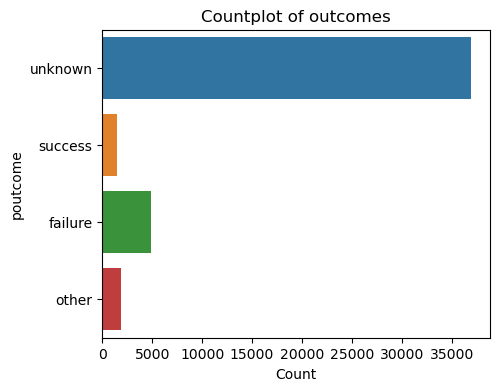

In [27]:
plt.figure(figsize=(5,4), facecolor='white')
sns.countplot(y='poutcome', data=df)
plt.xlabel('Count') 
plt.title('Countplot of outcomes') 
plt.show()

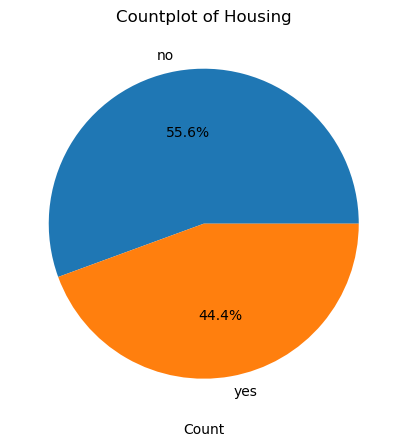

In [28]:
plt.figure(figsize=(5, 6), facecolor='white')
plt.pie(df['housing'].value_counts(), labels=df['housing'].unique(), autopct='%1.1f%%')
plt.xlabel('Count')
plt.title('Countplot of Housing')
plt.show()

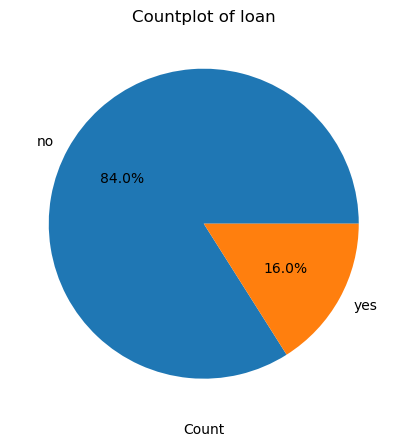

In [29]:
plt.figure(figsize=(5, 6), facecolor='white')
plt.pie(df['loan'].value_counts(), labels=df['housing'].unique(), autopct='%1.1f%%')
plt.xlabel('Count')
plt.title('Countplot of loan')
plt.show()

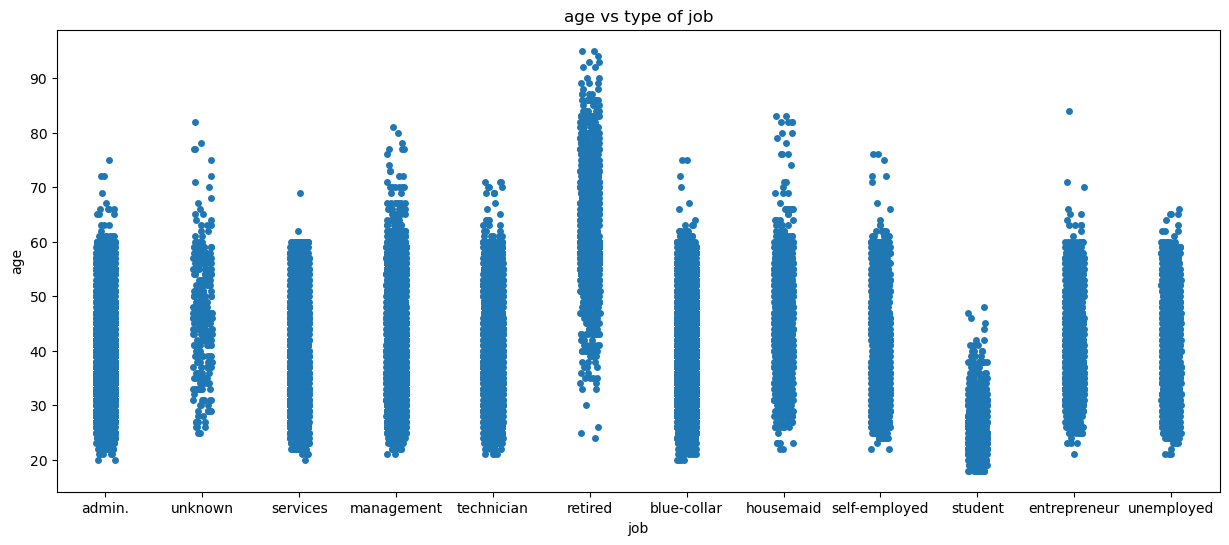

In [30]:
plt.figure(figsize=(15, 6), facecolor='white')
plt.title("age vs type of job")
sns.stripplot(x='job',y="age",data=df)
plt.show()

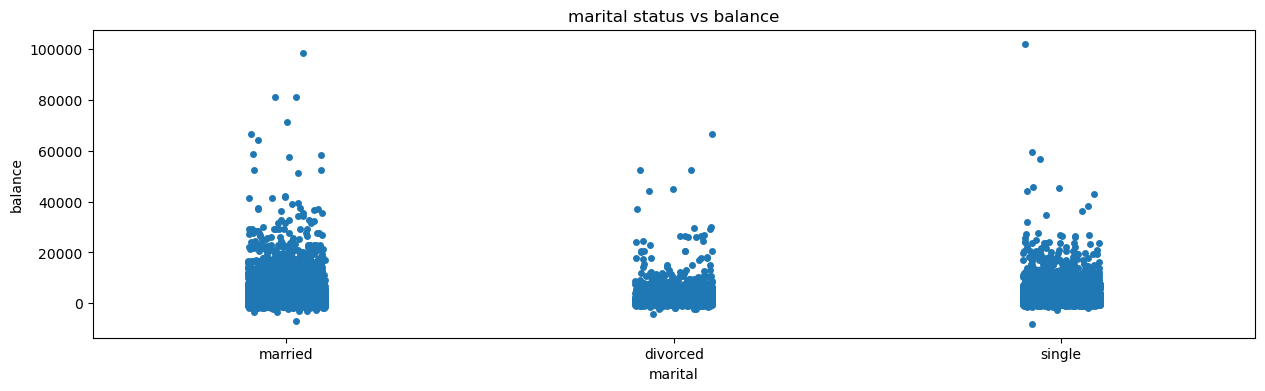

In [32]:
plt.figure(figsize=(15, 4), facecolor='white')
plt.title("marital status vs balance")
sns.stripplot(x='marital',y='balance',data=df)
plt.show()

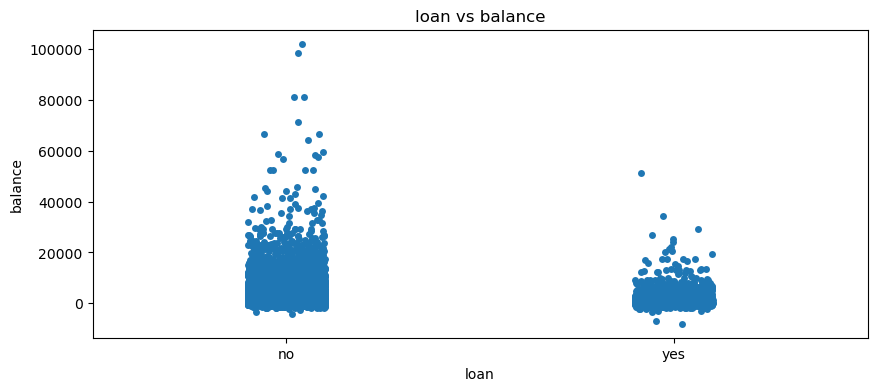

In [33]:
plt.figure(figsize=(10, 4), facecolor='white')
plt.title("loan vs balance")
sns.stripplot(x='loan',y='balance',data=df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

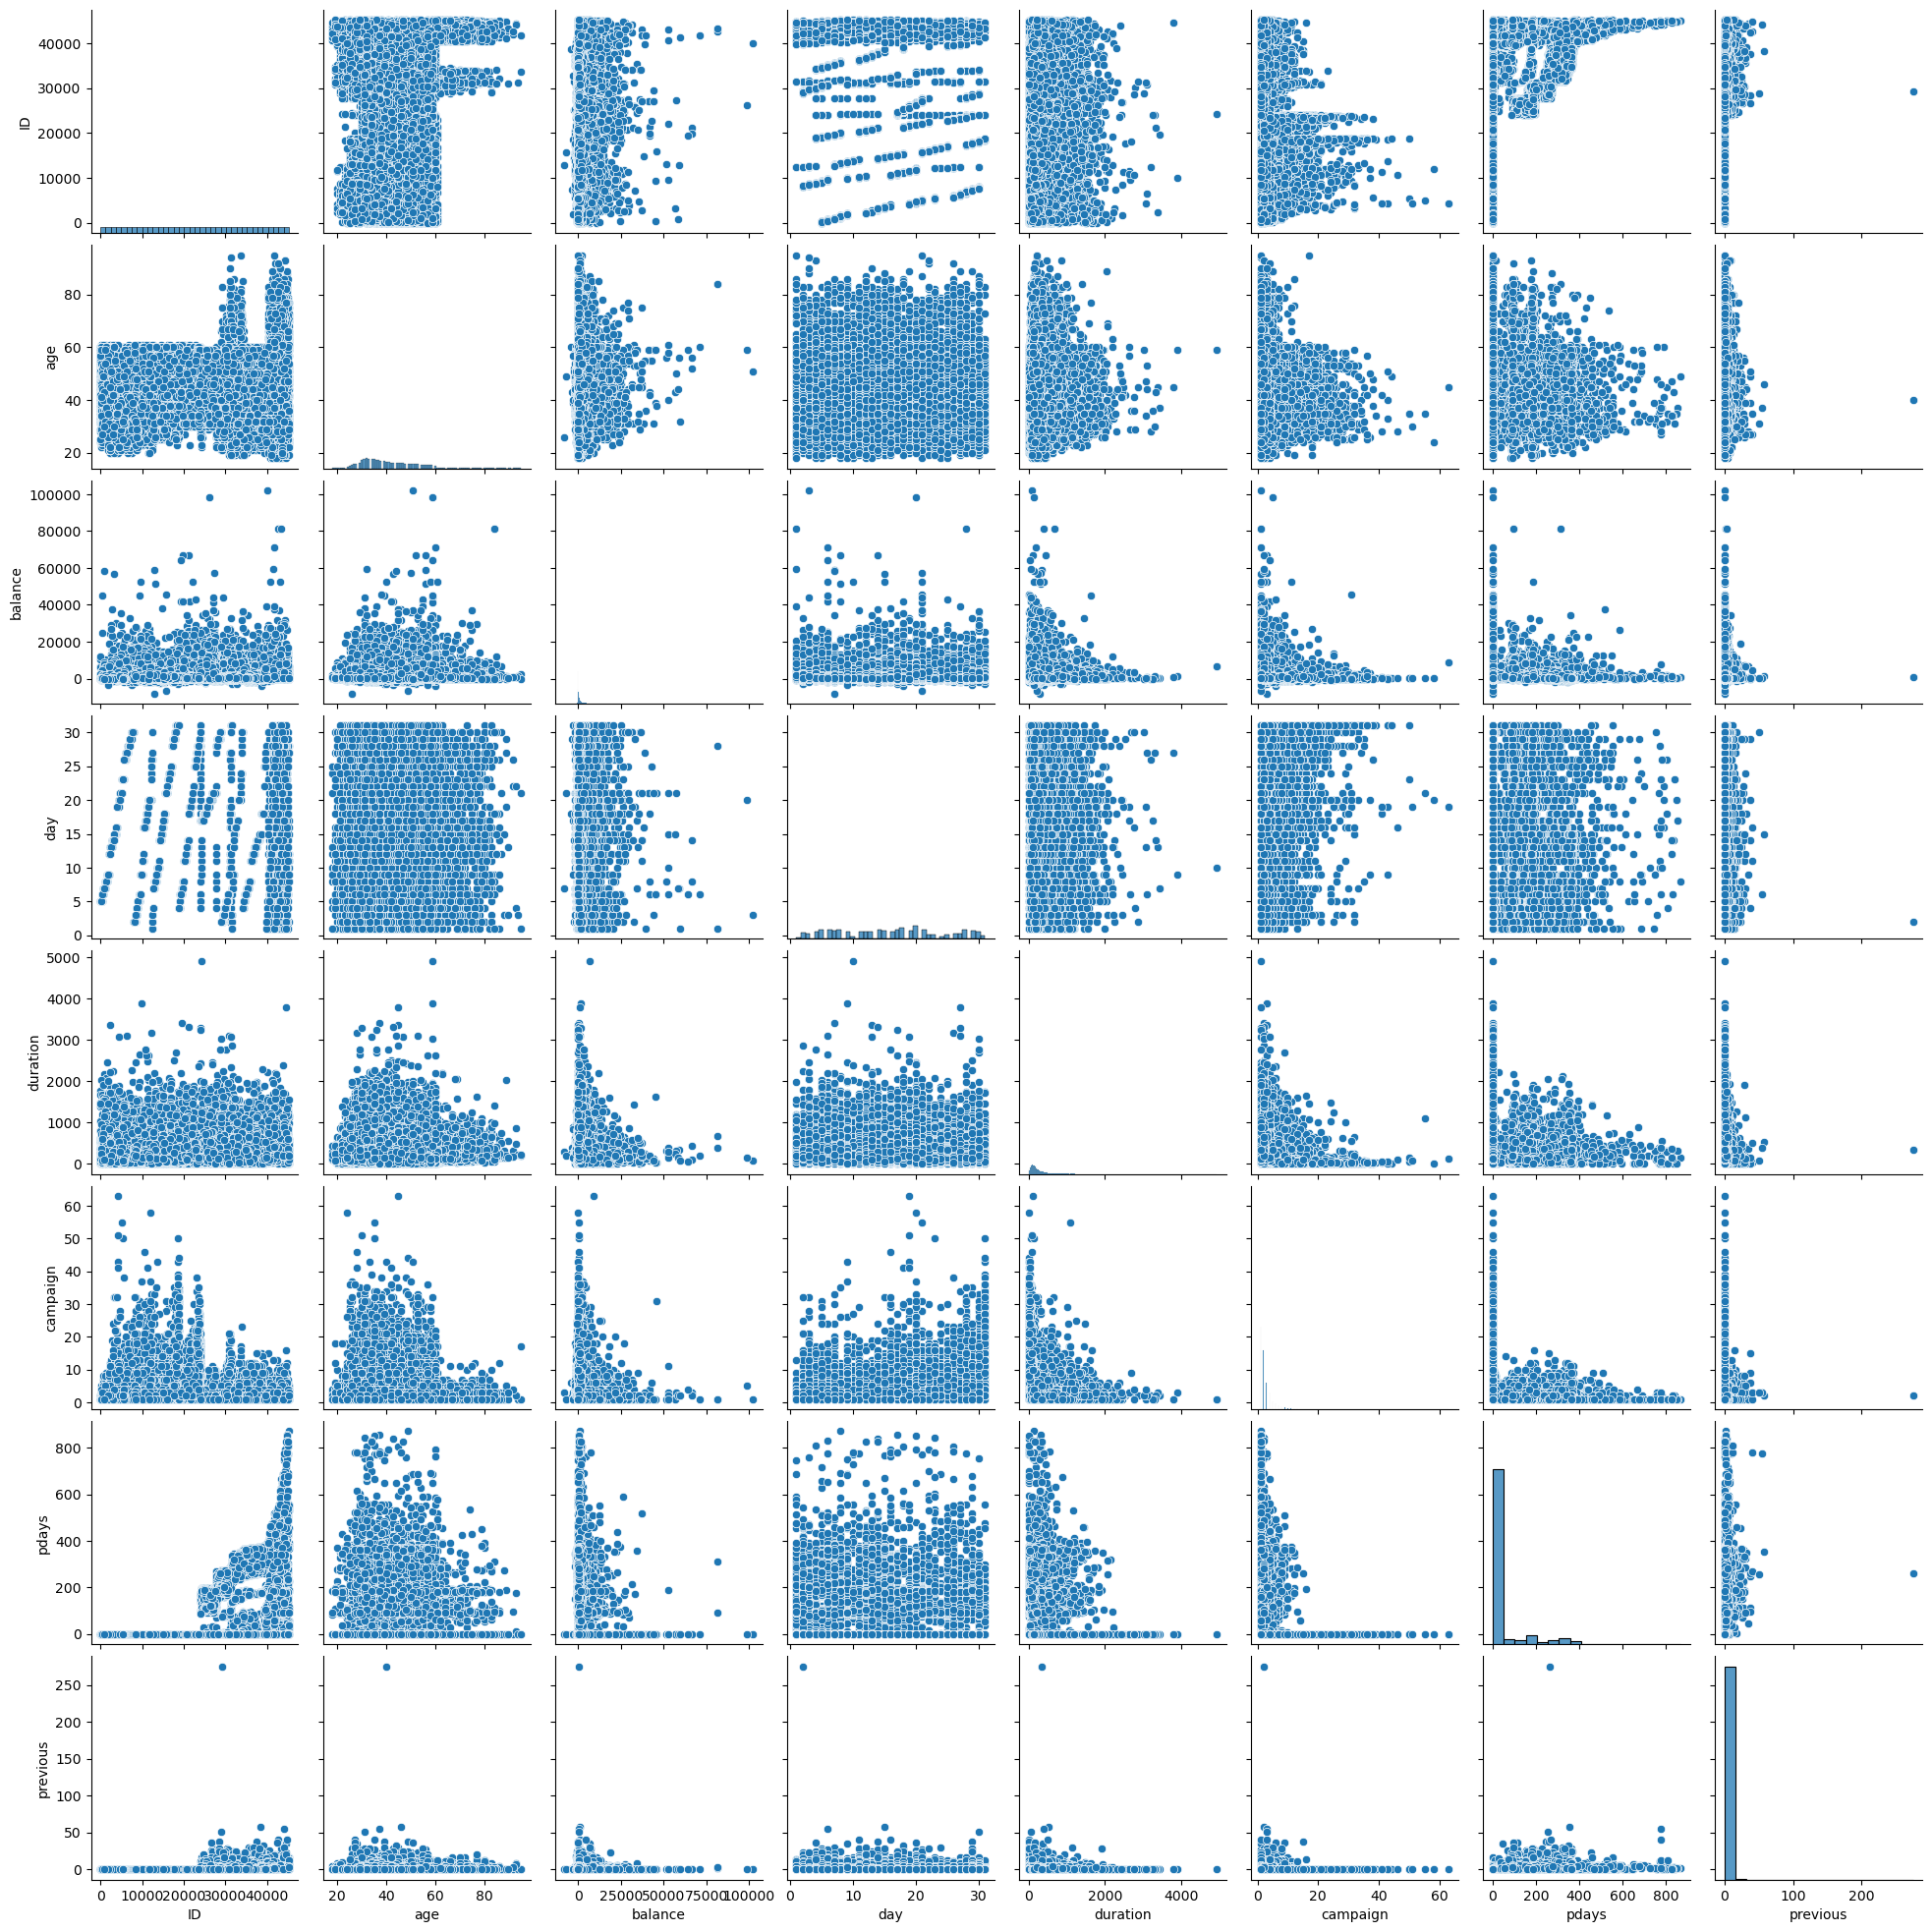

In [28]:
sns.pairplot(df)
plt.show

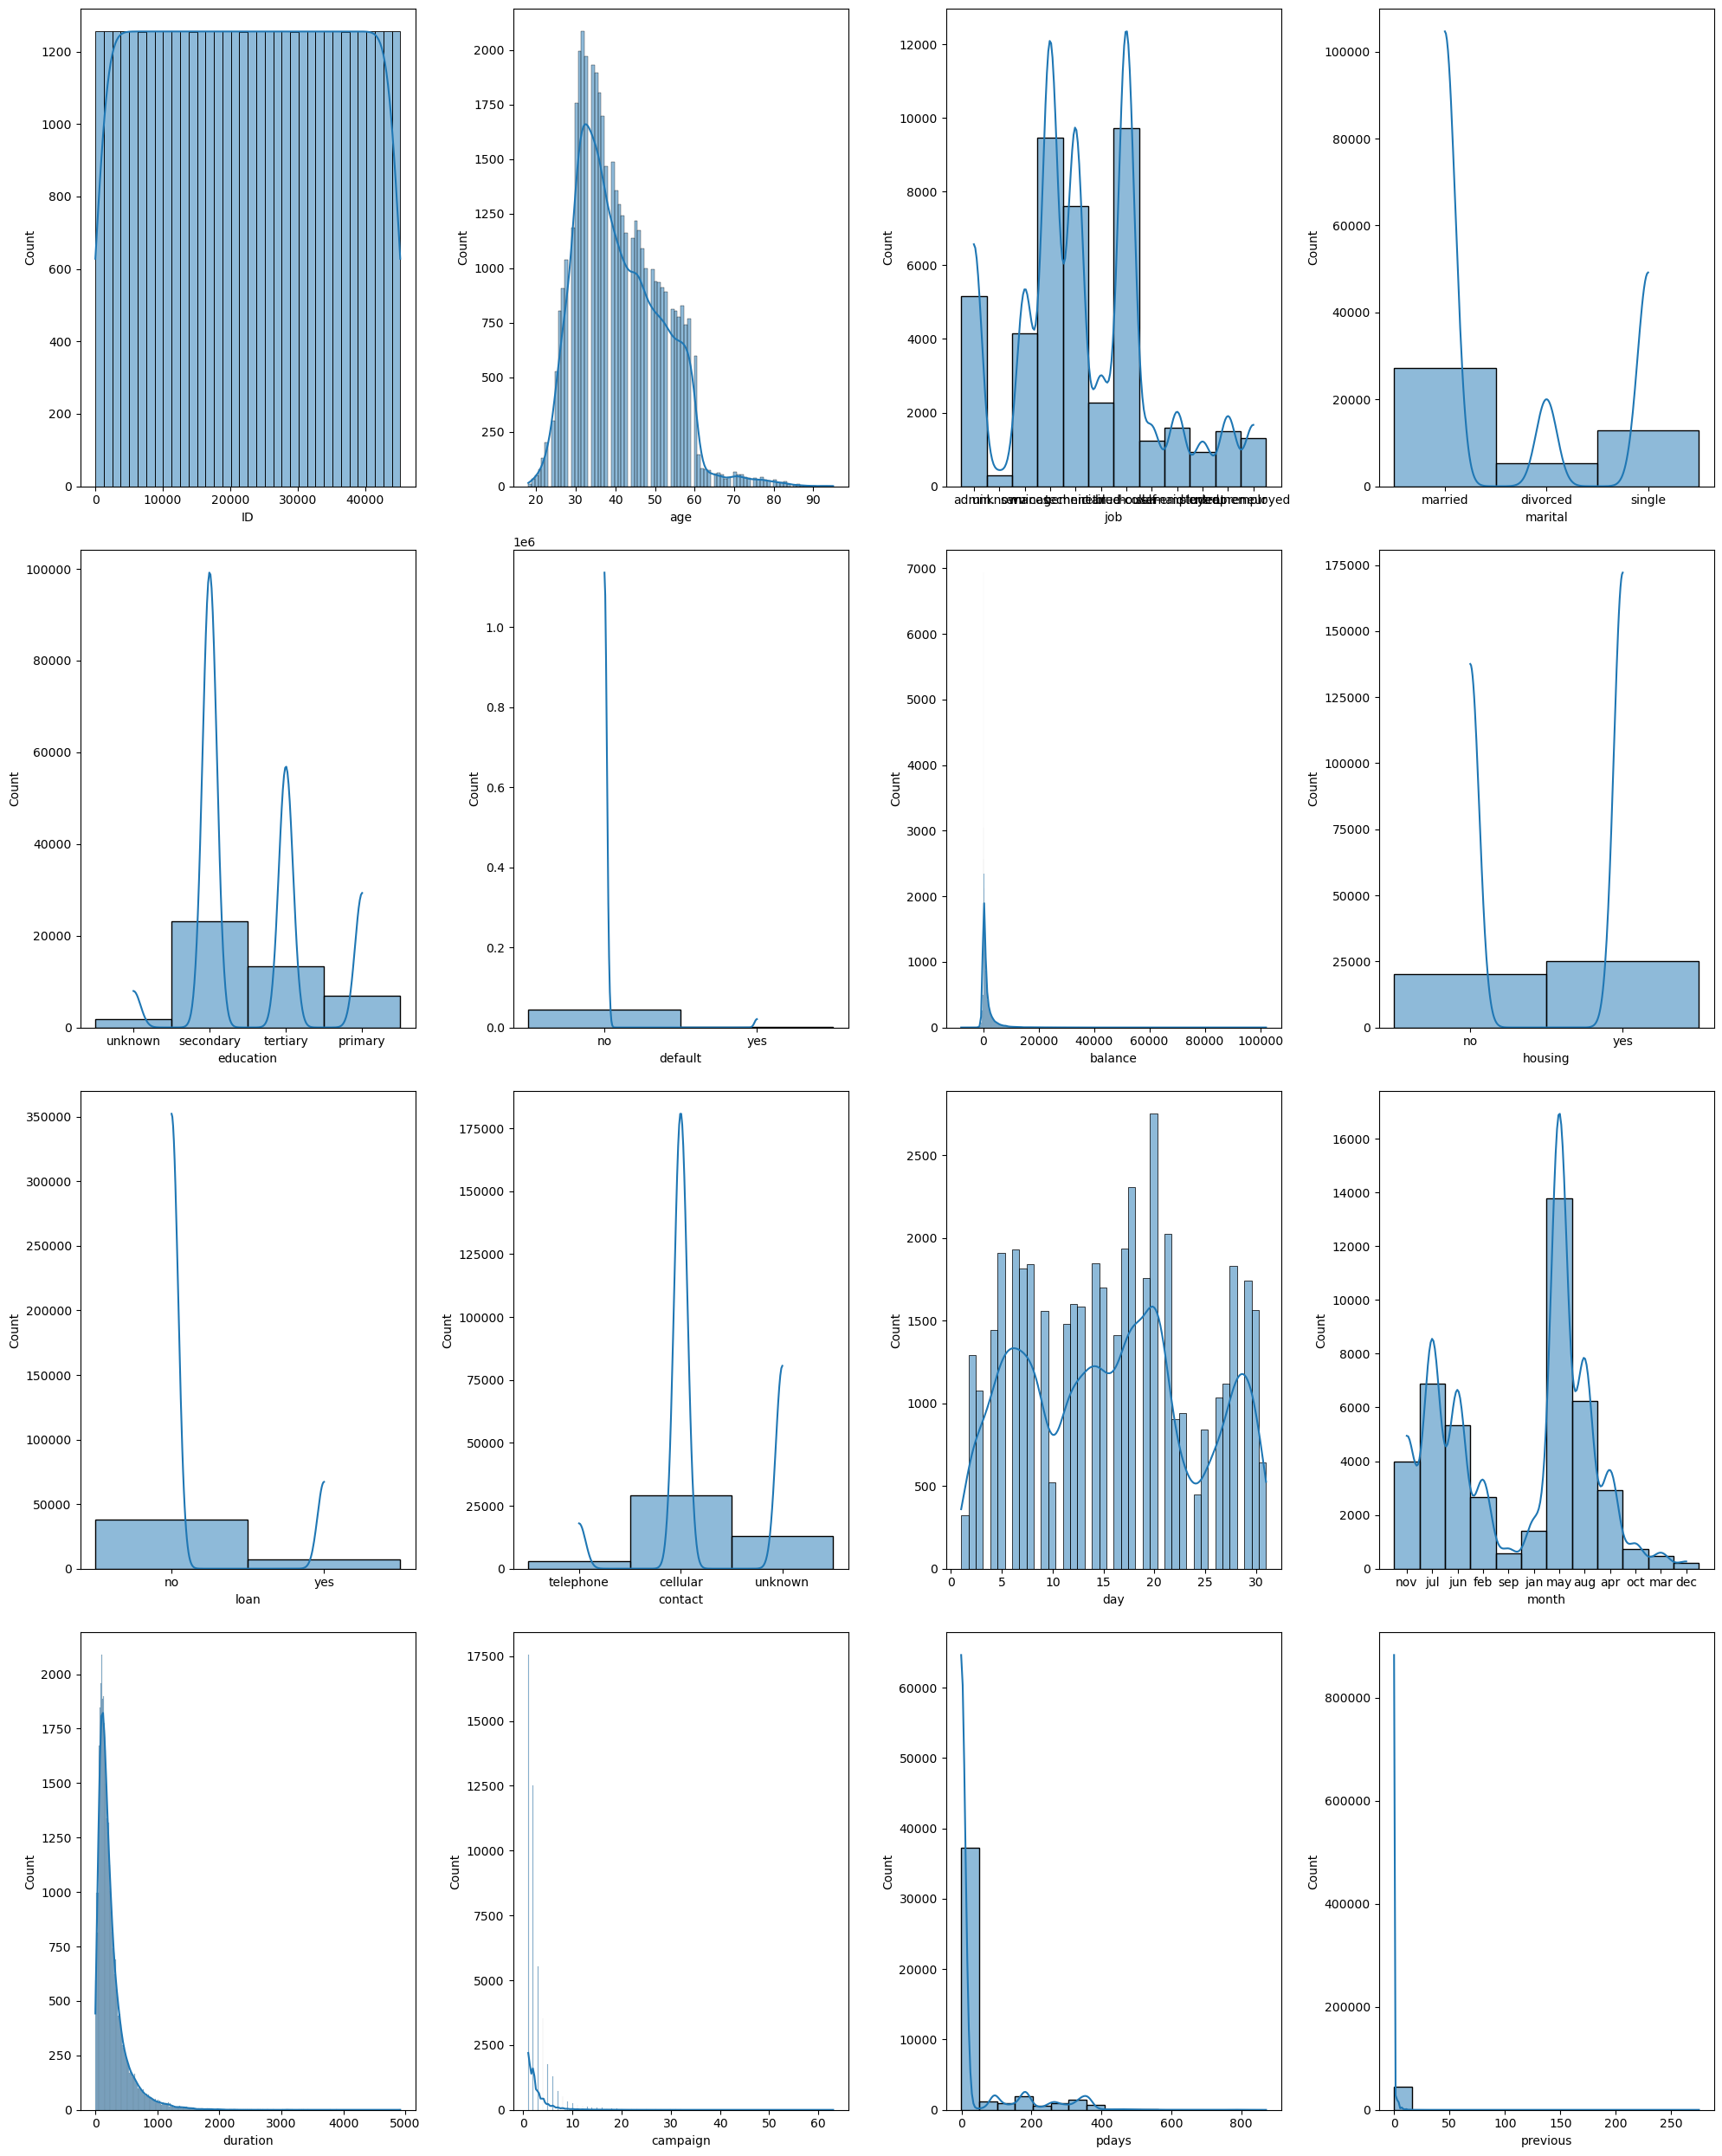

In [29]:
plt.figure(figsize=(20, 25))
pltno = 1
for i in df.columns:
    if pltno <= 16:
        ax = plt.subplot(4, 4, pltno)
        sns.histplot(df[i], kde=True)
        plt.xlabel(i)  
    pltno += 1
plt.tight_layout()
plt.show()

In [34]:
df['marital'].replace({'married':0,'divorced':1,'single':2},inplace=True)
df['education'].replace({'unknown':0,'secondary':1,'tertiary':2,'primary':3},inplace=True)
df['default'].replace({'no':0,'yes':1},inplace=True)
df['housing'].replace({'no':0,'yes':1},inplace=True)
df['loan'].replace({'no':0,'yes':1},inplace=True)
df['subscribed'].replace({'no':0,'yes':1},inplace=True)
df['contact'].replace({'telephone':0,'cellular':1,'unknown':2},inplace=True)
df['month'].replace({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12},inplace=True)
df['poutcome'].replace({'unknown':0,'success':1,'failure':2,'other':3},inplace=True)
df['job'].replace({'admin.':0,'unknown':1,'services':2,'management':3,'technician':4,'retired':5,'blue-collar':6,'housemaid':7,'self-employed':8,'student':9,'entrepreneur':10,'unemployed':11},inplace=True)
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,0,0,0,0,1933,0,0,0,19,11,44,2,-1,0,0,0
1,40576,31,1,0,1,0,3,0,0,1,20,7,91,2,-1,0,0,0
2,15320,27,2,0,1,0,891,1,0,1,18,7,240,1,-1,0,0,0
3,43962,57,3,1,2,0,3287,0,0,1,22,6,867,1,84,3,1,1
4,29842,31,4,0,1,0,119,1,0,1,4,2,380,1,-1,0,0,0


categorical data , so no outliers

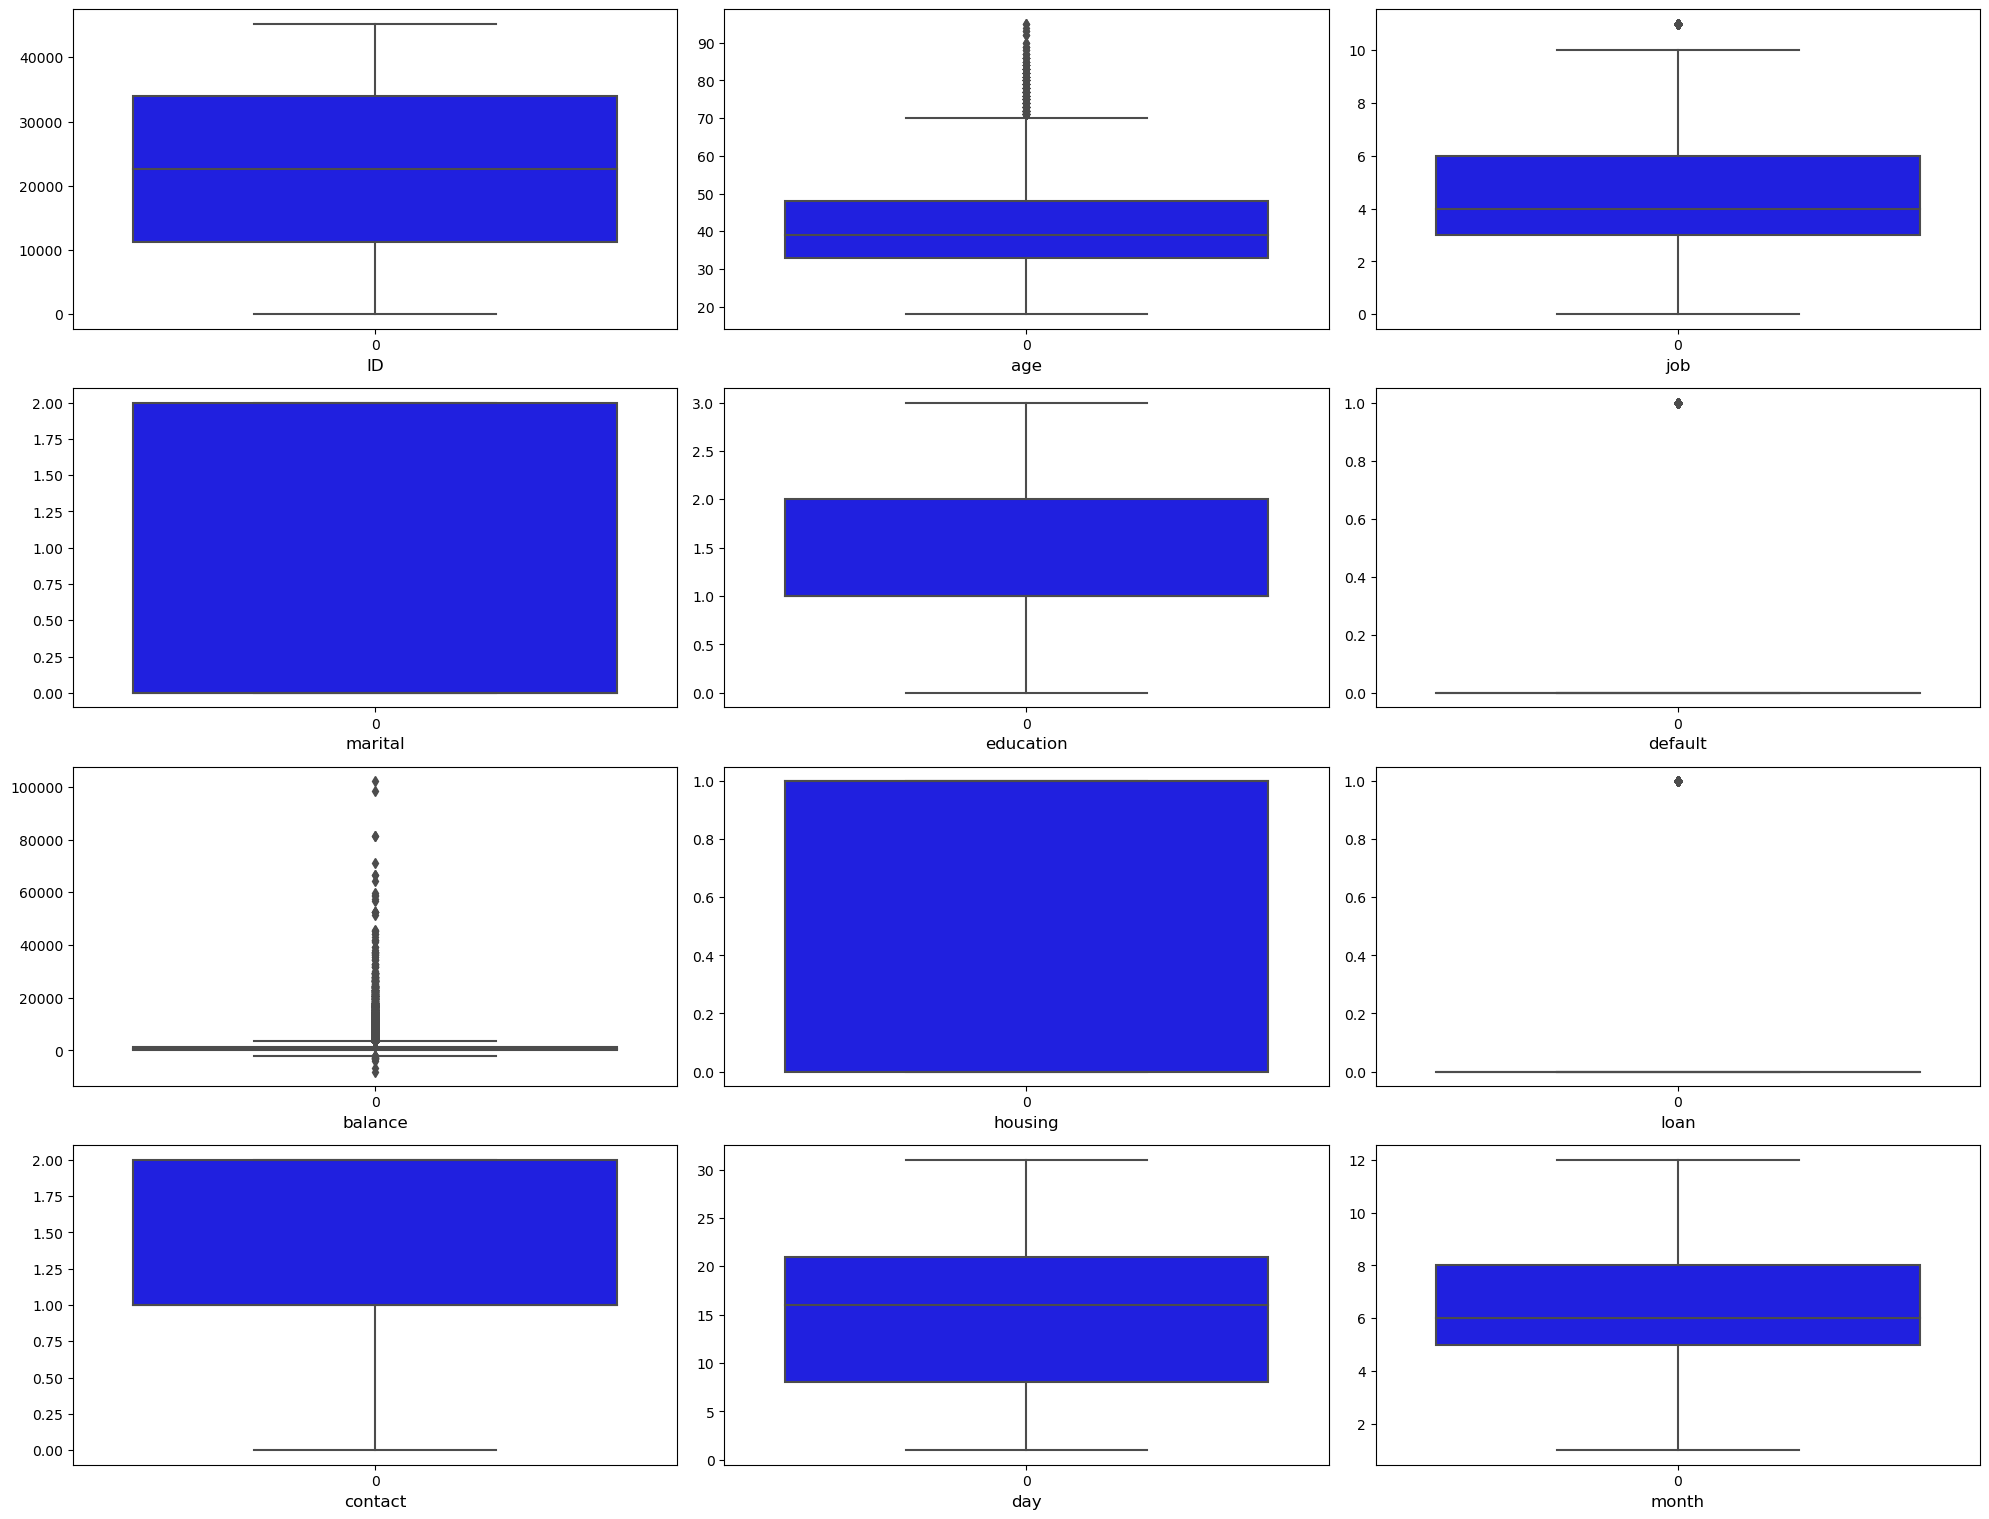

In [35]:
plt.figure(figsize=(20,30),facecolor="white")
pltno=1
for i in df:
    if pltno<=12:
        plt.subplot(8,3,pltno)
        sns.boxplot(df[i],color="b")
        plt.xlabel(i,fontsize=12)
    pltno+=1
plt.tight_layout()

<Axes: >

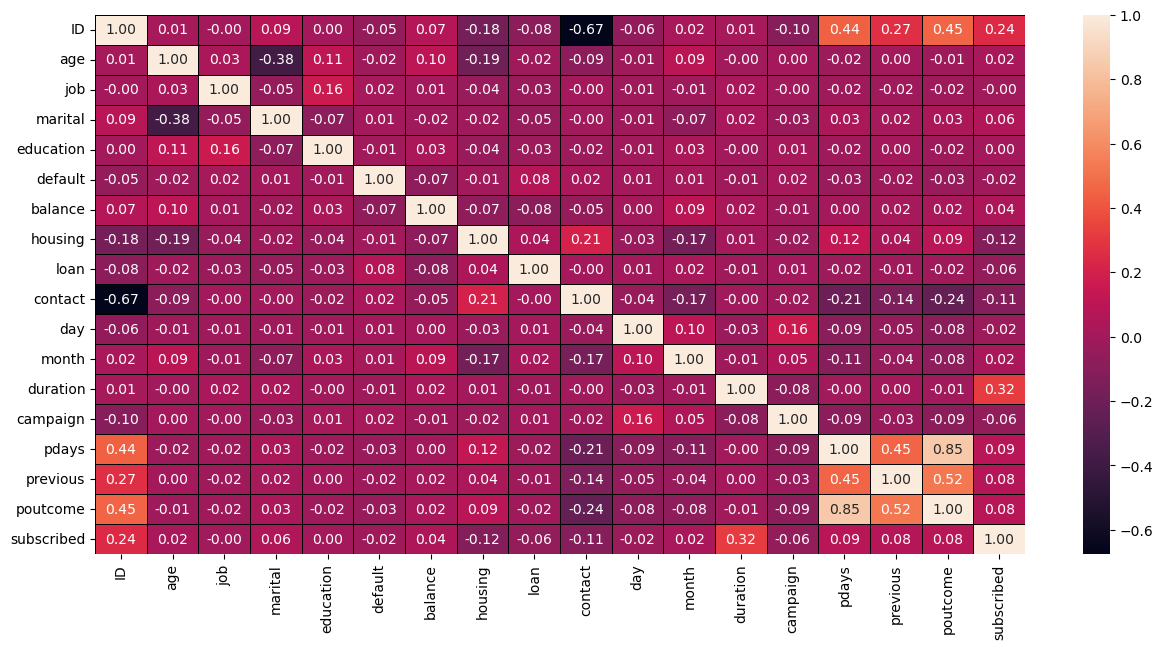

In [36]:
plt.figure(figsize =(15,7))
sns.heatmap(df.corr(),annot = True ,linewidths = 0.5,linecolor = 'black' , fmt = '.2f')

In [37]:
df.skew()

ID             0.000000
age            0.684818
job            0.447795
marital        0.668066
education      0.475041
default        7.245375
balance        8.360308
housing       -0.224766
loan           1.852617
contact        0.058320
day            0.093079
month          0.242842
duration       3.144318
campaign       4.898650
pdays          2.615715
previous      41.846454
poutcome       2.024086
subscribed     3.043024
dtype: float64

In [38]:
df['previous']=np.cbrt(df['previous'])

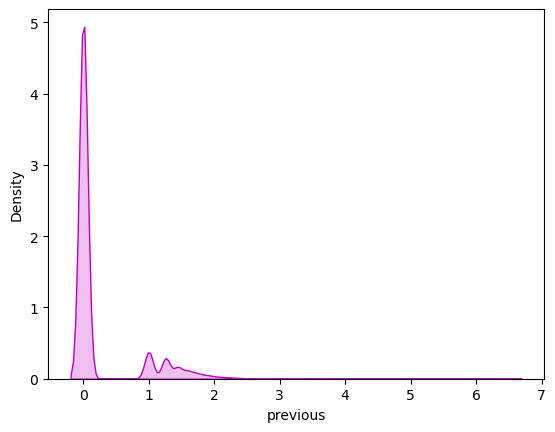

In [39]:
sns.distplot(df['previous'],color='m',kde_kws={"shade":True},hist=False)
plt.show()

In [40]:
df.skew()

ID            0.000000
age           0.684818
job           0.447795
marital       0.668066
education     0.475041
default       7.245375
balance       8.360308
housing      -0.224766
loan          1.852617
contact       0.058320
day           0.093079
month         0.242842
duration      3.144318
campaign      4.898650
pdays         2.615715
previous      2.056920
poutcome      2.024086
subscribed    3.043024
dtype: float64

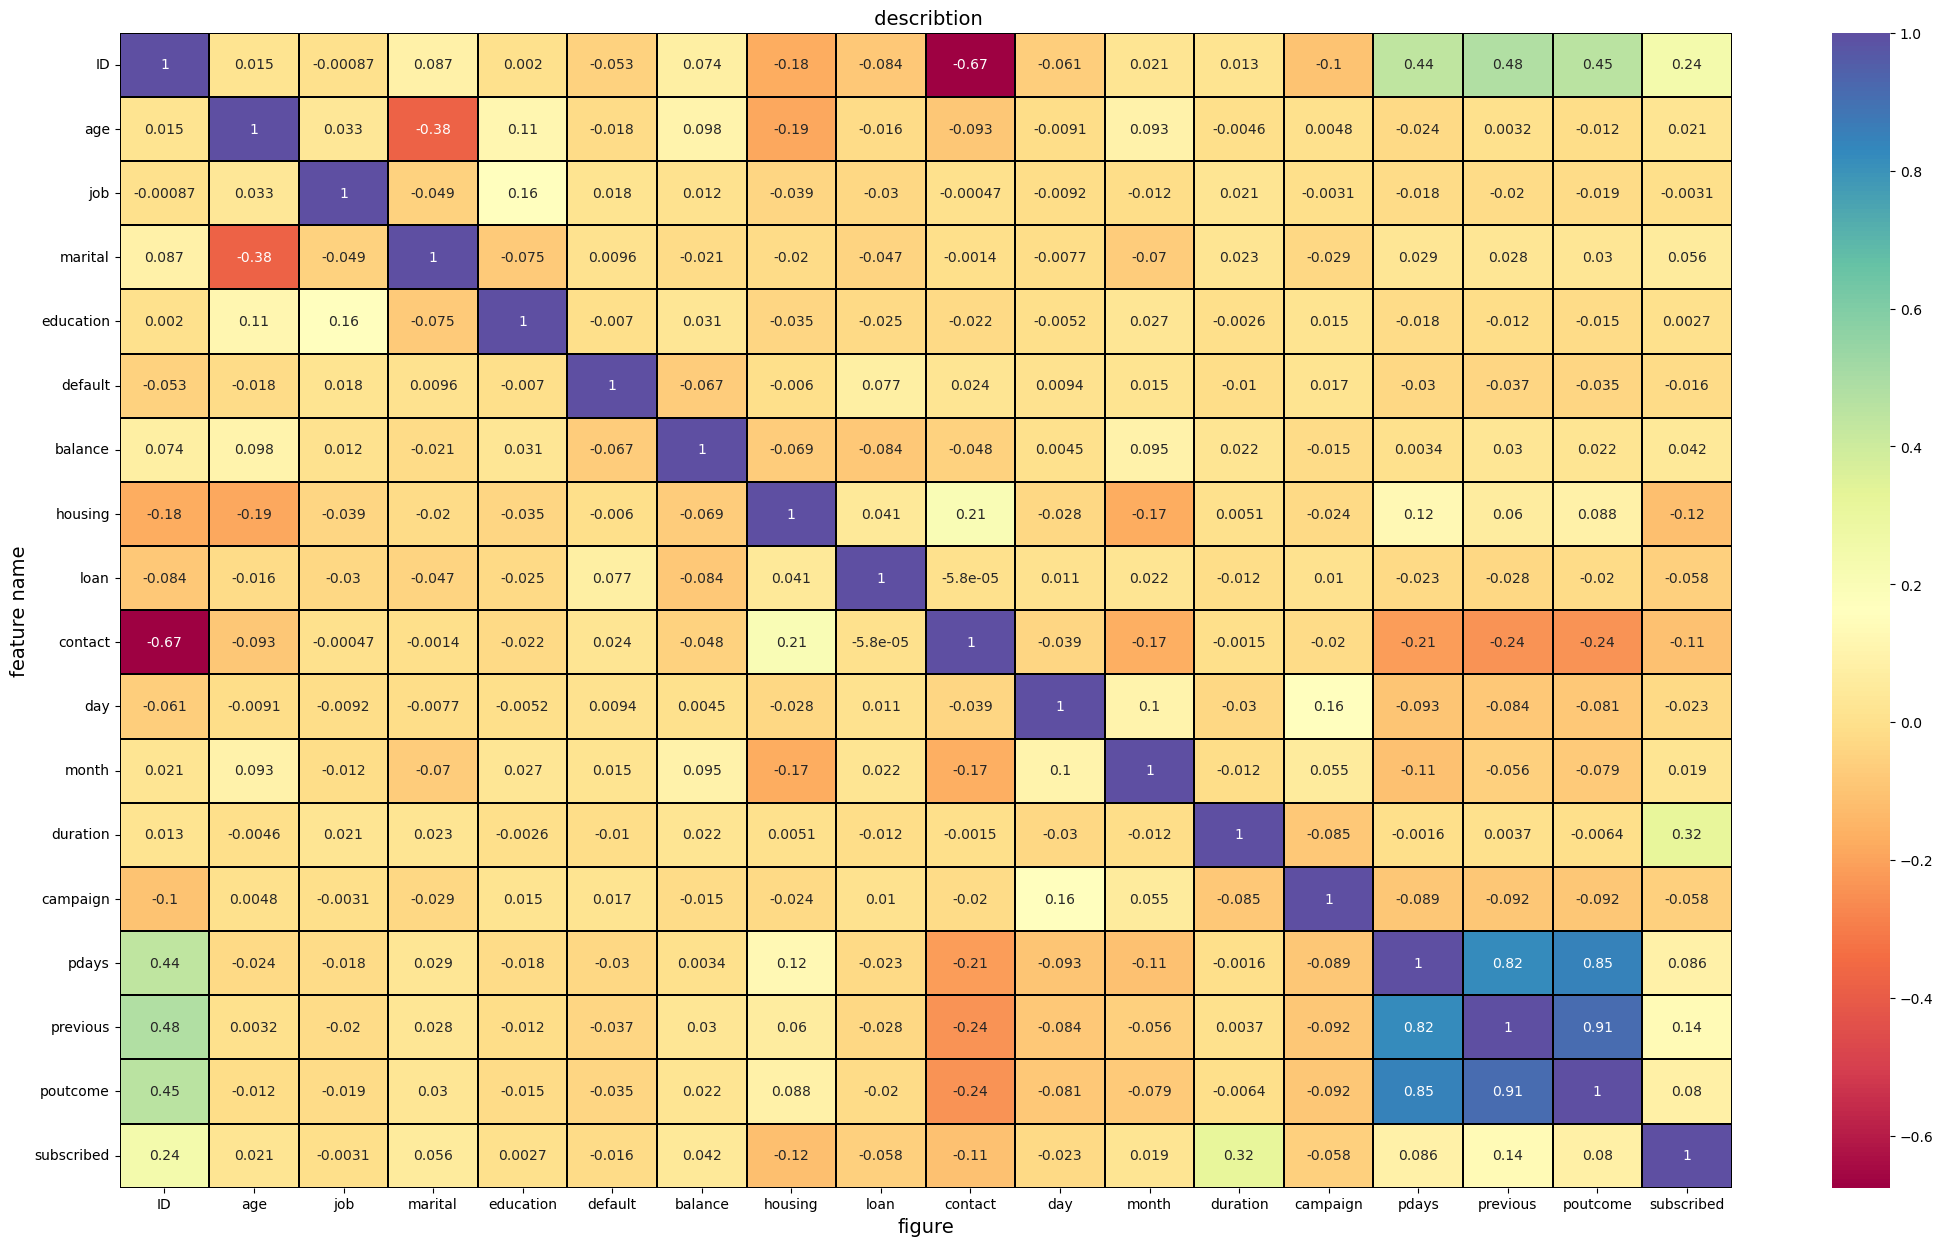

In [41]:
plt.figure(figsize = (26, 15))
sns.heatmap(df.corr(),linewidths=0.2,fmt='.2g',linecolor="black",annot=True,cmap="Spectral")
plt.xlabel('figure',fontsize=14)
plt.ylabel("feature name",fontsize=14)
plt.title(" describtion",fontsize=14)
plt.show()

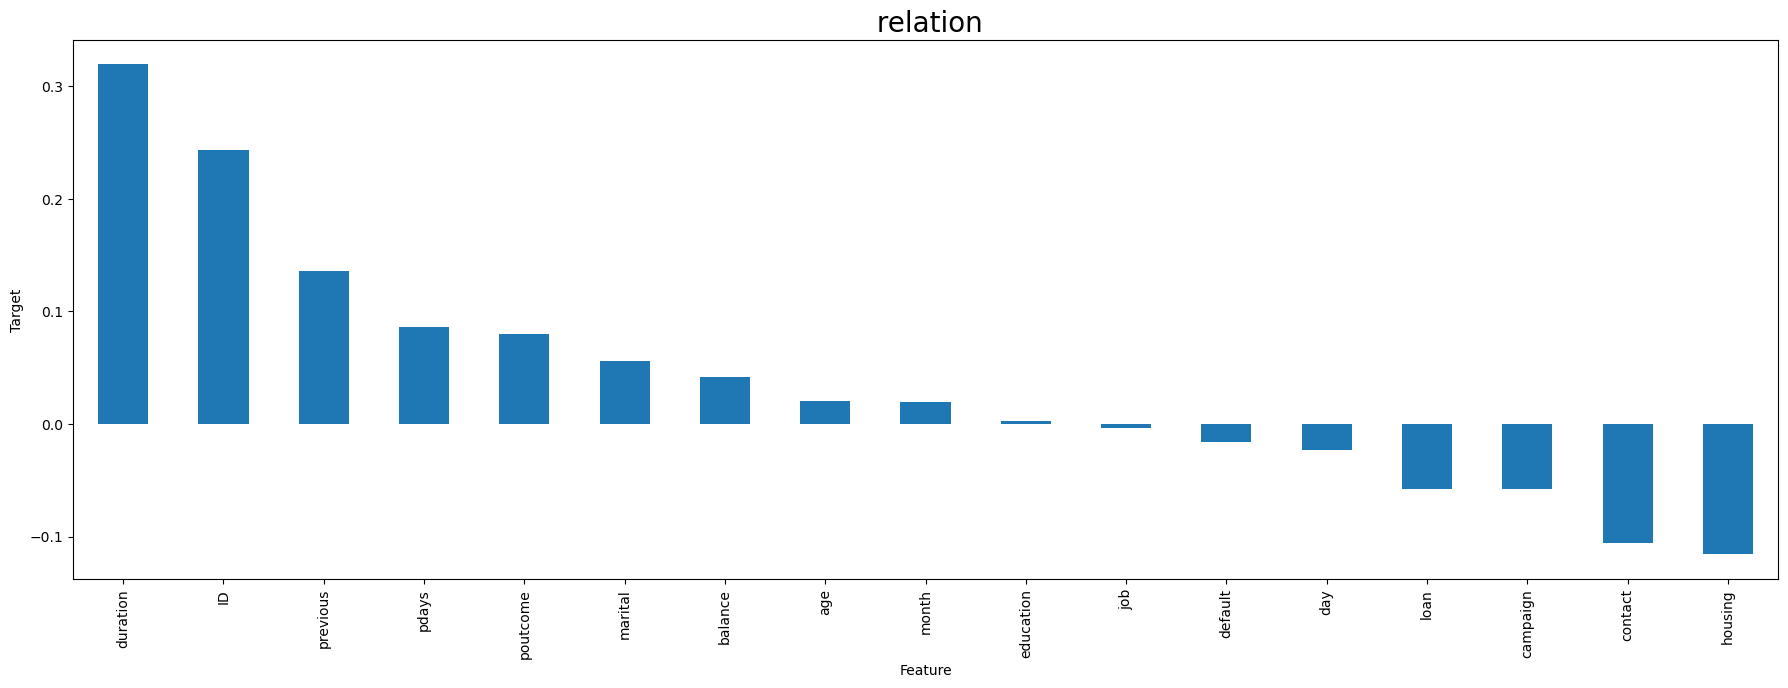

In [42]:
plt.figure(figsize=(22,7))
df.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title(" relation",fontsize=20)
plt.show()

# machine learning

In [43]:
x=df.drop('subscribed',axis=1)
y=df['subscribed']

In [44]:
print("feature dimension",x.shape)
print("label dimension",y.shape)

feature dimension (45211, 17)
label dimension (45211,)


In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.268479,1.418617,-1.617784,-0.769538,-1.957423,-0.13549,0.187448,-1.118674,-0.436803,-2.225971,0.383734,2.016333,-0.831621,-0.246560,-0.411453,-0.451840,-0.446705
1,1.376875,-0.935732,-1.244664,-0.769538,-0.699594,-0.13549,-0.446434,-1.118674,-0.436803,-0.406931,0.503892,0.355209,-0.649114,-0.246560,-0.411453,-0.451840,-0.446705
2,-0.558259,-1.312428,-0.871544,-0.769538,-0.699594,-0.13549,-0.154783,0.893915,-0.436803,-0.406931,0.263576,0.355209,-0.070529,-0.569351,-0.411453,-0.451840,-0.446705
3,1.636313,1.512791,-0.498423,0.360536,0.558234,-0.13549,0.632150,-1.118674,-0.436803,-0.406931,0.744208,-0.060073,2.364186,-0.569351,0.437463,2.174579,0.753081
4,0.554428,-0.935732,-0.125303,-0.769538,-0.699594,-0.13549,-0.408335,0.893915,-0.436803,-0.406931,-1.418634,-1.721197,0.473107,-0.569351,-0.411453,-0.451840,-0.446705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.065817,-0.182341,-0.498423,-0.769538,0.558234,-0.13549,-0.432640,-1.118674,-0.436803,-0.406931,1.465155,0.770490,-0.427776,0.399020,-0.411453,-0.451840,-0.446705
45207,-0.832331,1.230269,0.620937,-0.769538,1.816063,-0.13549,0.301743,0.893915,-0.436803,1.412108,0.503892,-0.060073,-0.388945,-0.569351,-0.411453,-0.451840,-0.446705
45208,0.435666,-0.559037,0.247817,-0.769538,1.816063,-0.13549,-0.353815,0.893915,-0.436803,-0.406931,1.585313,-2.136478,-0.474374,-0.569351,-0.411453,-0.451840,-0.446705
45209,1.728335,-1.124080,-1.617784,1.490610,-0.699594,-0.13549,-0.295025,-1.118674,-0.436803,-0.406931,-0.817845,2.016333,-0.194789,-0.246560,0.507374,2.174579,0.753081


In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

,VIF val,Feature
0,2.479520,ID
1,1.244835,age
2,1.031279,job
3,1.196849,marital
4,1.040656,education
5,1.013496,default
6,1.035666,balance
7,1.164300,housing
8,1.029809,loan
9,2.024544,contact


In [47]:
y.value_counts()

subscribed
0    41496
1     3715
Name: count, dtype: int64

In [48]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [49]:
y1.value_counts()

subscribed
0    41496
1    41496
Name: count, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix, roc_curve

from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)

In [52]:
model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression(),'nb':GaussianNB() ,
       'svm': SVC(kernel="linear"),'knn':KNeighborsClassifier(n_neighbors=3),'bg':BaggingClassifier(),'etc':ExtraTreesClassifier(),'gb':GradientBoostingClassifier(),}     
print(model)

{'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lgR': LogisticRegression(), 'nb': GaussianNB(), 'svm': SVC(kernel='linear'), 'knn': KNeighborsClassifier(n_neighbors=3), 'bg': BaggingClassifier(), 'etc': ExtraTreesClassifier(), 'gb': GradientBoostingClassifier()}


In [55]:
y_preds = {}
for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)
    y_preds[key] = y_pred
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
value.score(x_train,y_train)

0.9273943817739438

In [57]:
mae = {}
mse = {}
r2 = {}
rmse = {}
acc={}
for key, value in y_preds.items():
    mae[key] = mean_absolute_error(y_test, value)
    mse[key] = mean_squared_error(y_test, value)
    r2[key] = r2_score(y_test, value)
    rmse[key] = np.sqrt(mse[key])
    acc[key]=accuracy_score(y_test, value)
    
details = pd.DataFrame({
    'MAE': mae,
    'MSE': mse,
    'R-squared': r2,
    'RMSE': rmse,
    'Accuracy':acc,
})

print("\n details for each model:")
print(details)

best_model =max(acc, key=acc.get) and  min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model)


 details for each model:
          MAE       MSE  R-squared      RMSE  Accuracy
dt   0.109477  0.109477  -0.412037  0.330873  0.890523
rf   0.086033  0.086033  -0.109661  0.293315  0.913967
lgR  0.084706  0.084706  -0.092546  0.291044  0.915294
nb   0.183346  0.183346  -1.364805  0.428189  0.816654
svm  0.084706  0.084706  -0.092546  0.291044  0.915294
knn  0.095322  0.095322  -0.229470  0.308743  0.904678
bg   0.088798  0.088798  -0.145319  0.297990  0.911202
etc  0.085702  0.085702  -0.105382  0.292748  0.914298
gb   0.085038  0.085038  -0.096825  0.291613  0.914962

Best Model based on RMSE: lgR


In [58]:
final_model = LogisticRegression()
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc*100:.2f}%")

Accuracy: 91.53%


In [99]:
pred=final_model.predict(x_test)

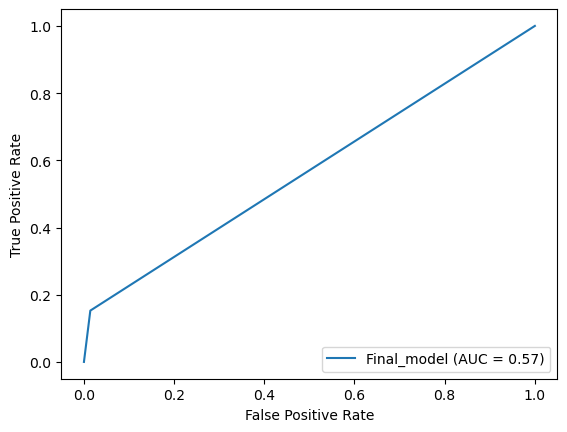

In [61]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
roc_auc = metrics.auc(fpr, tpr)

roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="Final_model")
roc_display.plot()


In [62]:
print(len(y_test))
print(len(pred))

9043
9043


In [107]:
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = pred
df["Original"] = a
df.head(3)

,Predicted,Original
0,0,0
1,0,0
2,0,0


In [65]:
y.head(1)

0    0
Name: subscribed, dtype: int64

In [70]:
print('will client subscribe ',model['lgR'].predict(scaler.transform([[0.268479,1.418617,-1.617784,-0.769538,-1.957423,-0.13549,0.187448,-1.118674,-0.436803,-2.225971,0.383734,2.016333,-0.831621,-0.24656,-0.411453,-0.45184,-0.446705]])))

will client subscribe  [0]
